# Player Analytics Methodologies at Micro-Level

## Motivation

• Most existing sports analytics done in the field of cricket is based on match-to-match data. 

• Our novel attempt is at devising a model that would predict various attributes of a player’s game based on data from each ball (play-by-play) across multiple games. 

• This would enable us to uncover hidden insights about the strength/weakness of a player and help define his play style.


## Data Preprocessing

• We leveraged data from a cricbuzz.com service to fetch running commentary for all One Day Internationals played by each player in about 50 One-Day International matches from the year 2016 onwards.

• We extracted different attributes about each ball such as ‘Delivery Line’, ’Delivery Length’, ’Speed of Ball’, ‘Type of Shot’ etc. from the running commentary, eyeballed the data  to complete otherwise missing records and successfully managed to obtain more than 2000 records for each player.

• Data was extracted for two of the leading run-scorers in Rohit Sharma (India) and David Warner (Australia).

In [92]:
# Import required libraries

import requests
import pandas as pd
from pathlib import Path

# Defining column names
COLUMN_NAMES=['Commentary','Runs','Delivery_Length','Delivery_Line','Shot_Type','Run/NoRun','Bowler_Type','Bowler_Name',
              'Avg_Ball_Speed','MatchID','Dismissal_Type','Beaten/NotBeaten','Home_Away','Good_Bad_Shot',
              'Opponent','Stadium','Shot_Zone','Delivery_Number','Toss','TossDecision','D/N']

# Converting to Pandas DataFrame
dfmain=pd.DataFrame(columns=COLUMN_NAMES)

In [29]:
#Ask the user to input player name
playername=input("Enter player name: ")

# Read Excel file if dataset found for the player else print 'File not found'
if Path('/Users/ankit/Google Drive/Study/Projects/DSP Assignments/Projects/Cricket Project/CSV/'+playername+'.xlsx').exists():
    print('File found')
    df1= pd.read_excel('/Users/ankit/Google Drive/Study/Projects/DSP Assignments/Projects/Cricket Project/CSV/'+playername+'.xlsx')
    #print(df1)
    dfmain=df1.copy()
else:
    df1=None
    print('File not found')

Enter player name: Rohit
File found


In [30]:
# asks user input for player country and MatchID
player_country=input("Enter the player country: ")
matchidstr=input("Enter the match ids: ")
if ',' in matchidstr:
    matchids=matchidstr.split(',')
else:
    matchids=matchidstr
for matchid in matchids:    
    print(matchid)
    df= pd.DataFrame(columns=COLUMN_NAMES)


Enter the player country: South Africa
Enter the match ids: 19160
1
9
1
6
0


In [31]:
#json response
jobj = requests.get('http://push.cricbuzz.com/match-api/'+matchid+'/commentary-full.json').json()

In [ ]:
#gets match id from json response
matchid=jobj['id']
#gets stadium name
stadium=jobj['venue']['name']
#gets country name
country= jobj['venue']['country']
#gets opponent name
if player_country.upper() not in jobj['team1']['name'].upper():
    opponent=jobj['team1']['name']
else:
    opponent=jobj['team2']['name'].upper()
#if toss is won by player's team value is 1 or else 0    
if player_country.upper() in jobj['toss']['winner'].upper():
    toss=1
else:
    toss=0
#if toss is won by player's team what desicion is taken
decision= jobj['toss']['decision']
    
if jobj['dn'] is False:
    day_night= 'D'
else:
    day_night= 'DN'

In [ ]:
#gets full commentary of the match    
    all_comments = jobj['comm_lines'] 

** Create lists for defining delivery length, line, beaten or not, shot type, fielding zones, bowler type and number of runs and summarize these using a dictionary**

In [ ]:
#delivery length
    full_toss = ['full toss']
    full=['full','fullish','fuller','pitched up','overpitch','bat down','up on the stumps',
          'up to the stumps','dab','dig','dug out','block','negates ','dead bat','dead-bat','sweep','defend','yorker','tossed up',
          'tosses it up','darted on']
    good_length=['length','good length','straight','on to the pads','pad','punch','drive','square cut','flick',
                 'backward point','flatter']
    short=['short','bouncer','back of a length','shortish','shoulders arms','shouldering arms','pull','hook',
           'let it pass','let it go','lets it go','left alone','seeing it through']
    del_length_dic= {'FullToss':full_toss,'Short':short,'Full':full,'GoodLength':good_length}
    
#delivery line
    wicket_to_wicket = ['on off','stumps','middle','leg','pad','into the body','dab','dug out','block',
                        'dig','glance','flick','angled into','full and straight','punched back','on the off stump',
                        'top of off','base of off','within the sticks']
    outside_stumps = ['wide of off','cover','outside off', 'around off','past the defence',
                      'widish','shouldering arms','shoulders arms','let it pass','let it go','lets it go','cover','square cut',
                      'left alone','seeing it through','miss','shape away','backward point','square','cramped for room','wide one'
                      ,'sees width','close to off','lets it pass','fourth stump','close to off','short and wide','some width','wider of off']
    del_line_dic= {'wicket_to_wicket':wicket_to_wicket,'outside_stumps':outside_stumps}

#beaten or not beaten
    not_beaten = ['defend','block','clips it','knocks it','tap','drives it','tuck','dug out','flick','negates ','dead bat','dead-bat','hit back',
                  'push','punch','played back','negotiate','dig','cut','dab','defen','fence','negates the ball','glance','flick','square on the leg-side',
                  'square drive','pull','hook','mid-wicket','sweep','drive','mid-on','mid-off','to cover','towards the cover','swept',
                  'edge','square cut','backward point']
    beaten = ['beaten','past the outside edge','let it pass','let it go','shouldering arms','lets it go','edge','carry through','ball whizzes past',
              'splice off the bat','left alone','seeing it through','shoulders arms','miss','corridor of uncertainty','play and a miss']
    beaten_dic= {'beaten':beaten,'not_beaten':not_beaten}

#shot type
    defensive_shot = ['defensive shot','dab','defen','dug out','block','negates the ball','pushed back','punched back','played back','dig']
    glance=['glance']
    flick=['flick','square on the leg-side']
    late_cut=['down to third man','third man']
    pull_hook=['pull','hook','mid-wicket']
    sweep=['swept','slog','sweep']
    drive=['drive','mid-on','mid-off','to cover','towards the cover','square drive']
    edge=['edge','splice off the bat']
    cut=['square cut','backward point']
    no_shot=['beat','past the outside edge','let it pass','let it go','shouldering arms','lets it go','carry through',
             'ball whizzes past','left alone','seeing it through','shoulders arms','miss','ignore','lets it pass',
             'leave comfortably','jammed out',"can't make any contact"]
    shot_type_dic= {'Glance':glance,'Flick':flick,'Late_Cut':late_cut,
                'Pull_hook':pull_hook,'Sweep':sweep,'Edge':edge,'Cut':cut,'Drive':drive,
                'Defensive_shot':defensive_shot,'No_shot':no_shot}
    
    #Zones
    fine_leg = ['fine leg', 'long leg','fine-leg', 'long-leg']
    square_leg=['square leg', 'leg gully', 'short leg','square-leg', 'leg-gully', 'short-leg']
    midwicket=['silly mid on','mid wicket','mid-wicket','cow cover']
    long_on=['mid on', 'long on','mid-on', 'long-on']
    long_off=['mid off','long off','mid-off','long-off']
    cover=['extra cover','cover','silly mid off','extra-cover']
    point=['silly point','point', 'gully','silly-point']
    third_man=['third man', 'slip','third-man']
    shot_zone_dic= {'FineLeg':fine_leg,'SquareLeg':square_leg,'Midwicket':midwicket,'LongOn':long_on,'LongOff':long_off,
                     'Cover':cover,'Point':point,'ThirdMan':third_man}

#bowler type
#fetch list of bowlers
    bowlers_dic={}
    bowlers=jobj['players']
    for bowler in bowlers:
        if 'bowl_style' in bowler:
            bowlers_dic[bowler['name']]=bowler['bowl_style'].lower()
            #bowlers_dic
        
#runs list
    lstrun=[1,2,3,4,5,6]

** To classify these attributes based on the commentary using conditionals and loops **

In [ ]:
#to get delivery number
    del_count=0    
    for comment in all_comments[:]:
        if 'comm' in comment:
            if 'to '+playername in str(comment['comm']):
                del_count=del_count+1
    delivery_number=del_count
    i=0
    for comment in all_comments[:]:
        if 'comm' in comment:
            if 'to '+playername in str(comment['comm']):
                #to fetch bowler name
                if 'to' in str(comment['comm']):
                    bowler_name=str(comment['comm']).split(' to')[0].strip()
                else:
                    bowler_name=None
                        
                # to fetch bowler type
                if bowler_name in bowlers_dic.keys():
                    bowler_type=bowlers_dic[bowler_name]
                else:
                    bowler_type=None
                
                #to fetch runs
                if '<b>four</b>' in str(comment['comm']).lower():
                    runs=4
                elif '<b>six</b>' in str(comment['comm']).lower():
                    runs=6
                elif '<b>single</b>' in str(comment['comm']).lower():
                    runs=1
                elif ('<b>wide</b>' in str(comment['comm']).lower()) or '<b>wides</b>' in str(comment['comm']).lower():
                    runs='wide'
                elif '<b>no ball</b>' in str(comment['comm']).lower():
                    runs='noball'
                elif 'run' in str(comment['comm']):
                    wrd=str(comment['comm']).split('run')[0]
                    if ',' in wrd:
                        runstr=wrd.split(',')[1].strip()
                        if runstr =='1':
                            runs=1
                        elif runstr =='2':
                            runs=2
                        elif runstr =='3':
                            runs=3
                        elif runstr =='no':
                            runs=0
                        else:
                            runs=None
                    else:
                        runs=None
                else:
                    runs=None
                #run or no run
                if runs ==0:
                    run_norun='norun'
                elif runs in lstrun:
                    run_norun='run'
                else:
                    run_norun='norun'
            
                #to fectch bowl speed
                if (',' in str(comment['comm'])) and (str(comment['comm']).count(',')>1) :
                    bs=str(comment['comm']).split(',')[2]
                    if 'kph' in bs.lower():
                        bowl_speed_str=bs.split('kph')[0]
                        bowl_speed=bowl_speed_str.split(' ')[-1].strip()
                    else:
                        bowl_speed=None
                else:
                    bowl_speed=None
                
                #Dismissal Type
                if "that's out!!" in str(comment['comm']).lower():
                    if '</b>' in str(comment['comm']):
                        dismissal_type=str(comment['comm']).split('</b>')[1]
                    else:
                        dismissal_type=None
                else:
                    dismissal_type=None
            
                #delivery length type
                delivery_length='Unknown'
                for k,v in del_length_dic.items():
                    for j in v:
                        if j in str(comment['comm']).lower():
                            delivery_length=k
                            break
                    if delivery_length != 'Unknown':
                        break
                #delivery line type  
                delivery_line='Unknown'
                for a,b in del_line_dic.items():
                    for q in b:
                        if q in str(comment['comm']).lower():
                            delivery_line=a
                            break
                    if delivery_line != 'Unknown':
                        break
                
                #shot type  
                shot_type= 'Unknown'
                for h,l in shot_type_dic.items():
                    if h=='Defensive_shot':
                        if ((runs==0) and (('push' in str(comment['comm']).lower()) or ('tap' in str(comment['comm']).lower()))):
                            shot_type=h
                            break
                        else:
                            for q in l:
                                if q in str(comment['comm']).lower():
                                    shot_type=h
                                    break
                    else:
                        for q in l:
                            if q in str(comment['comm']).lower():
                                shot_type=h
                                break
                        if shot_type != 'Unknown':
                            break
                    
                #shot type  
                beaten_notbeaten='Unknown'
                if (runs is not None) and (runs in ['1','2','3','4','5','6']):
                    beaten_notbeaten='not_beaten'
                else:
                    for u,o in beaten_dic.items():
                        for q in o:
                            if q in str(comment['comm']).lower():
                                beaten_notbeaten=u
                                break
                        if beaten_notbeaten != 'Unknown':
                            break

** To classify venue, shot, delivery length, extra runs, delivery number **

In [ ]:
 #home or away
                if country.upper().strip() == player_country.upper():
                    home_away='home'
                else:
                    home_away='away'
                #clasify shot as good(if runs scores is >=2) or bad (if runs scores is <2)  
                if ((runs is not None) and (runs not in ['wide','noball']) and (runs >=1) 
                and (shot_type.lower().strip() in ['glance','flick','late_cut','pull_hook','sweep','cut','drive']) and (dismissal_type is None) ):
                    good_bad_shot='good'
                else:
                    good_bad_shot='bad'
                
                #delivery length type
                shot_zone='Unknown'
                for g,t in shot_zone_dic.items():
                    for j in t:
                        if j in str(comment['comm']).lower():
                            shot_zone=g
                            break
                    if shot_zone !='Unknown':
                        break
                    
                
                if runs not in ['wide','noball']:
                    #delivery number
                    delivery_number=delivery_number-1
                    df.loc[i]=[comment['comm'],runs,delivery_length,delivery_line,shot_type,run_norun,bowler_type,
                           bowler_name,bowl_speed,matchid,dismissal_type,beaten_notbeaten,home_away,good_bad_shot,opponent,
                           stadium,shot_zone,delivery_number,toss,decision,day_night]
                    i=int(i)+1

** Append to the DataFrame and write to an Excel file **

In [ ]:
#Appending new data to main dataframe, hence getting data from different matches
dfmain=dfmain.append(df)

#write to a excel file at the specified location
writer = pd.ExcelWriter('D:/knowledge/college docs/DSP/Project_1/New/'+playername+'.xlsx')
dfmain.to_excel(writer)
writer.save()

## Exploratory Data Analysis

In [35]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#Reading the input excel
df_Rohit = pd.read_excel("Rohit.xlsx")

In [37]:
df_Rohit.head()

,Commentary,Runs,Delivery_Length,Delivery_Line,Shot_Type,Run/NoRun,Bowler_Type,Bowler_Name,Avg_Ball_Speed,MatchID,...,Beaten/NotBeaten,Home_Away,Good_Bad_Shot,Opponent,Stadium,Shot_Zone,Delivery_Number,Toss,TossDecision,D/N
2,"Morne Morkel to Rohit, no run, stays in the cr...",0,Short,outside_stumps,Defensive_shot,norun,right arm fast,Morne Morkel,139.2,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Unknown,29,0,Batting,DN
3,"Morne Morkel to Rohit, 2 runs, <b>almost dragg...",2,Short,wicket_to_wicket,Edge,run,right arm fast,Morne Morkel,139.2,19160,...,beaten,away,bad,South Africa,Kingsmead,FineLeg,28,0,Batting,DN
4,"Rabada to Rohit, 1 run, good comeback from Rab...",1,GoodLength,outside_stumps,Late_Cut,run,right arm fast,Rabada,138.3,19160,...,beaten,away,good,South Africa,Kingsmead,Point,27,0,Batting,DN
5,"Rabada to Rohit, no run, Rohit must be cursing...",0,Full_toss,outside_stumps,Pull_hook,norun,right arm fast,Rabada,138.3,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Midwicket,26,0,Batting,DN
6,"Rabada to Rohit, no run, pacy back of a length...",0,Short,wicket_to_wicket,Defensive_shot,norun,right arm fast,Rabada,138.3,19160,...,not_beaten,away,bad,South Africa,Kingsmead,Unknown,25,0,Batting,DN


In [38]:
df_Rohit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 2 to 0
Data columns (total 22 columns):
Commentary          2192 non-null object
Runs                2192 non-null int64
Delivery_Length     2192 non-null object
Delivery_Line       2192 non-null object
Shot_Type           2192 non-null object
Run/NoRun           2192 non-null object
Bowler_Type         2192 non-null object
Bowler_Name         2192 non-null object
Avg_Ball_Speed      2192 non-null float64
MatchID             2192 non-null int64
Dismissal           2192 non-null int64
Dismissal_Type      35 non-null object
Beaten/NotBeaten    2192 non-null object
Home_Away           2192 non-null object
Good_Bad_Shot       2192 non-null object
Opponent            2192 non-null object
Stadium             2192 non-null object
Shot_Zone           2192 non-null object
Delivery_Number     2192 non-null int64
Toss                2192 non-null int64
TossDecision        2192 non-null object
D/N                 2192 non-null object


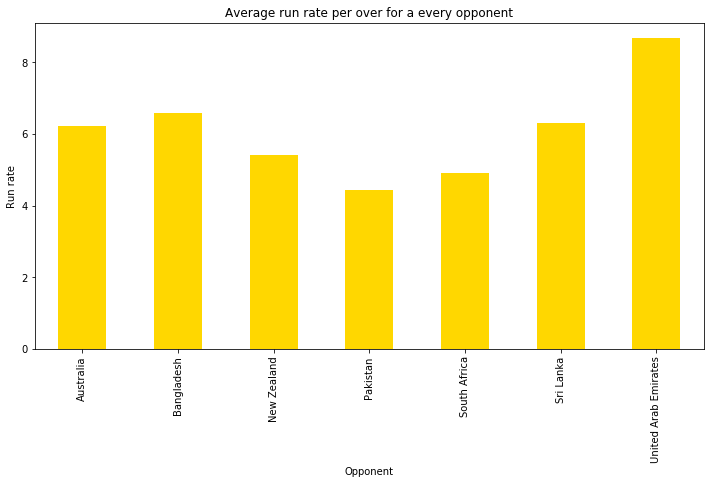

In [43]:
#Average run rate per over for a given opponent
plt.figure(figsize=(12,6))
df1 = df_Rohit.groupby(['Opponent'])['Runs'].sum()/df_Rohit.groupby(['Opponent'])['Run/NoRun'].count()*6
df1.plot(kind = 'bar', title = 'Average run rate per over for a every opponent', color = 'gold')
plt.ylabel('Run rate')

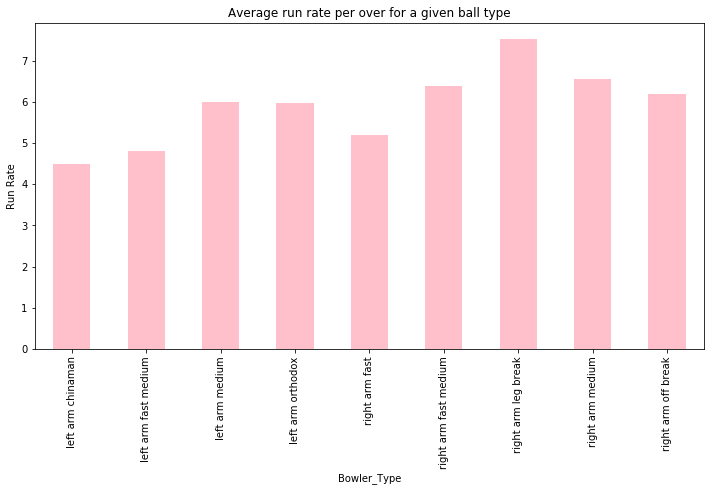

In [44]:
#Average run rate per over for a given ball type
plt.figure(figsize=(12,6))
df2 = df_Rohit.groupby(['Bowler_Type'])['Runs'].sum()/df_Rohit.groupby(['Bowler_Type'])['Run/NoRun'].count()*6
df2.plot(kind = 'bar', title = 'Average run rate per over for a given ball type', color = 'pink')
plt.ylabel('Run Rate')

## Inference: 

**In a crunch situation if there is a need to pick up a bowler who needs to defend runs, it can be seen from the graph that a left arm bowler would be much effective as compared to right arm.**


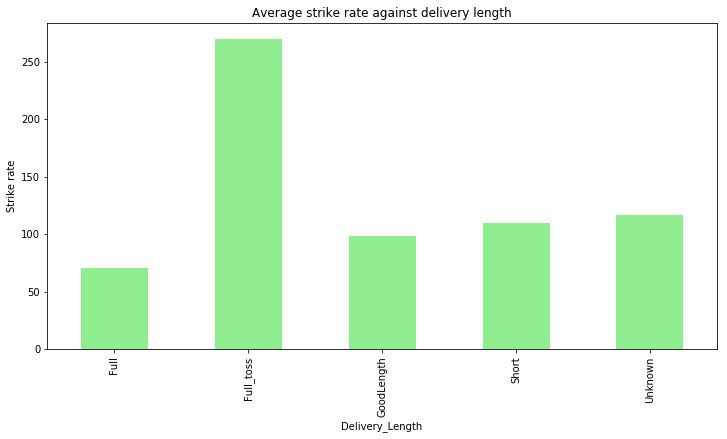

In [46]:
#Strike rate per 100 balls
plt.figure(figsize=(12,6))
df3 = (df_Rohit.groupby(['Delivery_Length'])['Runs'].sum()/df_Rohit.groupby(['Delivery_Length'])['Commentary'].count())*100
df3.plot(kind = 'bar', title = 'Average strike rate against delivery length', color = 'lightgreen')
plt.ylabel('Strike rate')

## Inference:
** Full Toss ball will be penalized, plays short balls well as compared to full length**


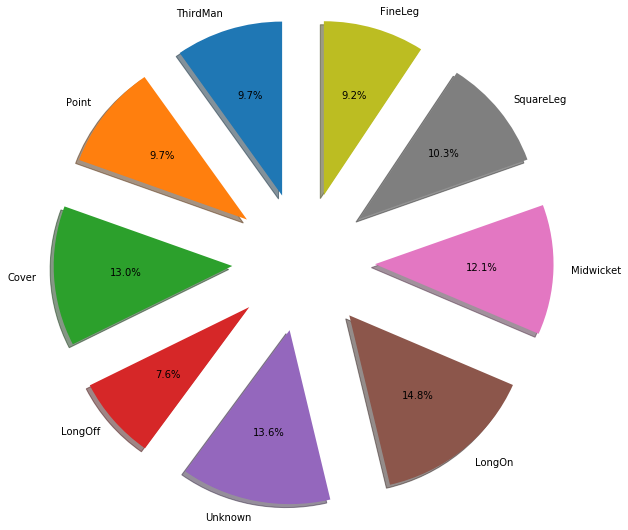

In [52]:
# % of runs scored in different shot zone
(df_Rohit.groupby(['Shot_Zone'])['Runs'].sum()/df_Rohit['Runs'].sum())*100

plt.figure(figsize=(8,8))
labels = ['ThirdMan', 'Point', 'Cover', 'LongOff', 'Unknown', 'LongOn', 'Midwicket',  'SquareLeg', 'FineLeg']
sizes = ['9.719023', '9.719023', '12.989406', '7.646246', '13.588208', '14.785813', '12.068171', '10.317826', '9.166283']
explode = (0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4)
wedges, patches, texts = plt.pie(sizes, labels=labels, shadow=True, explode=explode, autopct='%1.1f%%', startangle=90)

# Inference:
**Most of the runs have been scored in the Long On region, comparatively Long Off is least scored region**

In [53]:
#% of good shot and bad shots played for each opponent
(df_Rohit.groupby(['Opponent','Good_Bad_Shot']).size()/df_Rohit.groupby(['Opponent'])['Good_Bad_Shot'].count())*100

Opponent              Good_Bad_Shot
Australia             bad              67.178771
                      good             32.821229
Bangladesh            bad              55.026455
                      good             44.973545
New Zealand           bad              71.818182
                      good             28.181818
Pakistan              bad              75.609756
                      good             24.390244
South Africa          bad              77.678571
                      good             22.321429
Sri Lanka             bad              69.125214
                      good             30.874786
United Arab Emirates  bad              77.777778
                      good             22.222222
dtype: float64

In [54]:
#Subsetting to get only dismissal data
df_RohitDismissal = df_Rohit.loc[(df_Rohit.Dismissal == 1),:]

df_Rohit_col = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type', 'Dismissal_Type']

for i in df_Rohit_col:
    print(df_RohitDismissal[i].value_counts())

right arm fast           11
right arm fast medium    10
left arm fast medium      6
right arm medium          4
right arm off break       2
right arm leg break       1
left arm orthodox         1
Name: Bowler_Type, dtype: int64
Short         15
GoodLength    12
Full           8
Name: Delivery_Length, dtype: int64
outside_stumps      17
wicket_to_wicket    17
Unknown              1
Name: Delivery_Line, dtype: int64
Edge              9
Pull_hook         8
Unknown           5
Flick             3
Sweep             3
Late_Cut          2
Drive             2
No_shot           2
Defensive_shot    1
Name: Shot_Type, dtype: int64
 Caught!!           25
 Lbw!!               5
 Caught&Bowled!!     2
 Bowled!!            2
 Run Out!!           1
Name: Dismissal_Type, dtype: int64


# Inference:
**Probability of getting a wicket of Rohit increases by bowling a Short ball outside off stump close to the body or good length delivery outside the off stump since most caught dismissal are from Edge's**

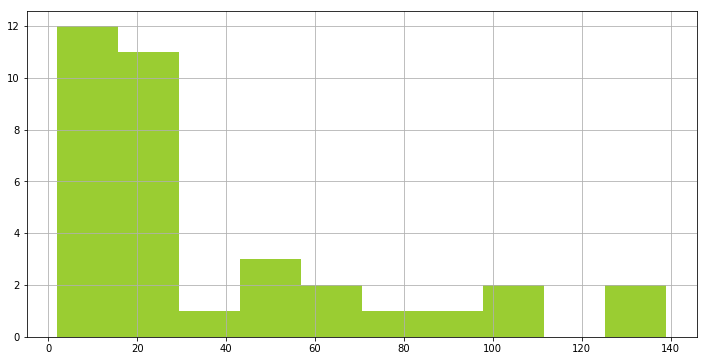

In [56]:
plt.figure(figsize=(12,6))
df_RohitDismissal['Delivery_Number'].hist(color = 'yellowgreen')

# Inference:
**From the data it can be seen that the probability of getting Rohit Sharma's wicket decreases drastically once he has played more than 30 balls**

## Vizualization

Target variables distribution

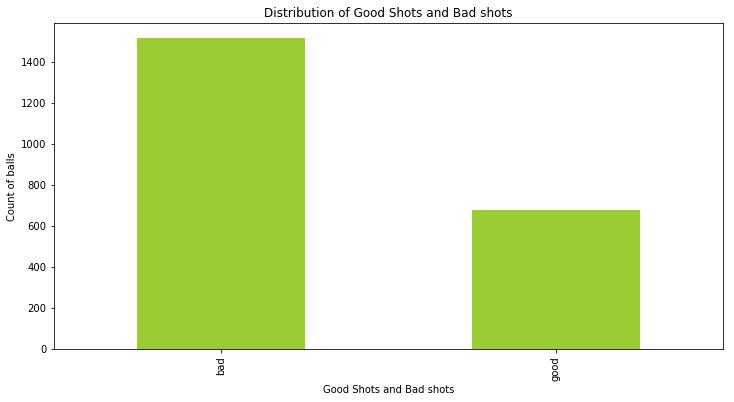

In [58]:
#Distribution of Good Shots and Bad shots
plt.figure(figsize=(12,6))
y = ['Good_Bad_Shot']
df_Rohit['Good_Bad_Shot'].value_counts().plot(kind='bar',color=['yellowgreen'])
plt.title("Distribution of Good Shots and Bad shots")
plt.xlabel("Good Shots and Bad shots")
plt.ylabel("Count of balls")


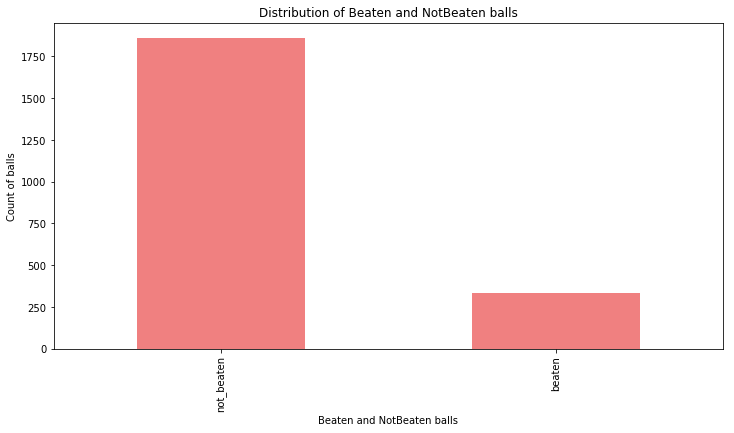

In [59]:
#Distribution of Beaten and NotBeaten balls
plt.figure(figsize=(12,6))
df_Rohit['Beaten/NotBeaten'].value_counts().plot(kind='bar',color=['lightcoral'])
plt.title("Distribution of Beaten and NotBeaten balls")
plt.xlabel("Beaten and NotBeaten balls")
plt.ylabel("Count of balls")

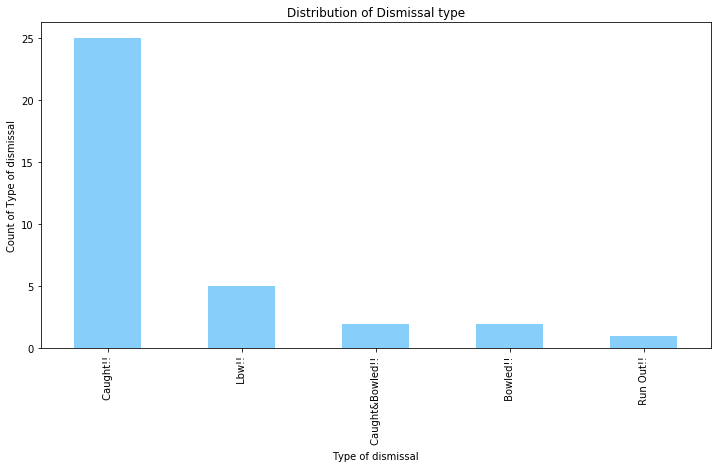

In [60]:
#Distribution of Dismissal type
plt.figure(figsize=(12,6))
df_Rohit['Dismissal_Type'].value_counts().plot(kind='bar',color=['lightskyblue'])
plt.title("Distribution of Dismissal type")
plt.xlabel("Type of dismissal")
plt.ylabel("Count of Type of dismissal")

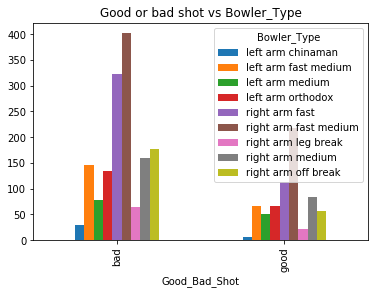

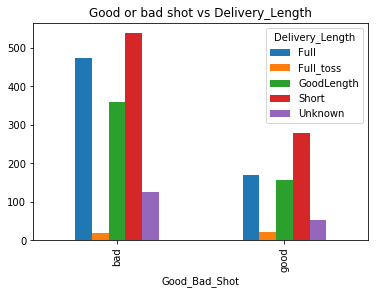

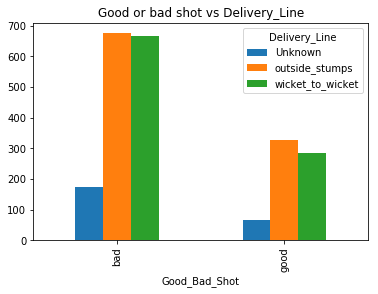

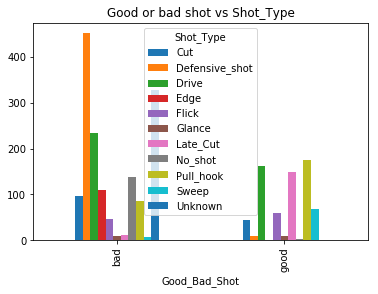

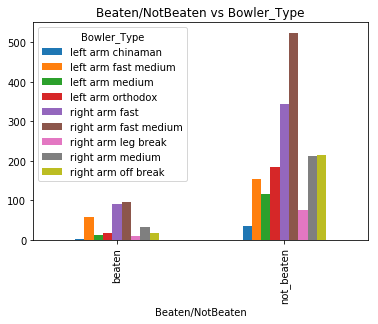

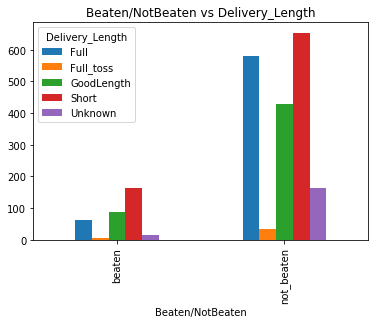

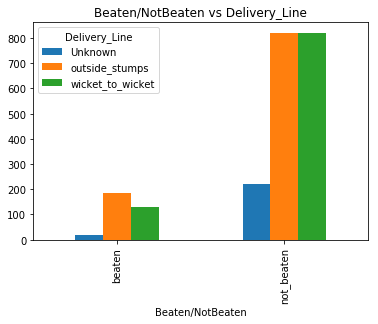

In [63]:
# Vizualization of all the independent variables against output variables.

df_Rohit2 = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type']
for i in df_Rohit2:
    if(i!='Good_Bad_Shot'): 
        cross_tab = pd.crosstab(df_Rohit['Good_Bad_Shot'],df_Rohit[i])
        cross_tab.plot(kind='bar')
        plt.title("Good or bad shot vs"+" "+i)
        
df_Rohit3 = ['Bowler_Type','Delivery_Length','Delivery_Line']
for i in df_Rohit3:
    if(i!='Beaten/NotBeaten'): 
        cross_tab = pd.crosstab(df_Rohit['Beaten/NotBeaten'],df_Rohit[i])
        cross_tab.plot(kind='bar')
        plt.title("Beaten/NotBeaten vs"+" "+i)

## Machine Learning Models

In [69]:
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Handling Categorical Variables - Get Dummies

Most Machine Learning models don't work well with numerical attributes. By encoding these variables to numerical values, we attempt at making our ML models run better.


In [70]:
categorical_columns = ['Bowler_Type','Delivery_Length','Delivery_Line','Shot_Type',]
tempdf = pd.get_dummies(df_Rohit, columns=categorical_columns)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 2 to 0
Data columns (total 46 columns):
Commentary                           2192 non-null object
Runs                                 2192 non-null int64
Run/NoRun                            2192 non-null object
Bowler_Name                          2192 non-null object
Avg_Ball_Speed                       2192 non-null float64
MatchID                              2192 non-null int64
Dismissal                            2192 non-null int64
Dismissal_Type                       35 non-null object
Beaten/NotBeaten                     2192 non-null object
Home_Away                            2192 non-null object
Good_Bad_Shot                        2192 non-null object
Opponent                             2192 non-null object
Stadium                              2192 non-null object
Shot_Zone                            2192 non-null object
Delivery_Number                      2192 non-null int64
Toss                           

In [71]:
# We create a DataFrame containing all features.
x = tempdf[['Delivery_Length_Full','Delivery_Length_Full_toss','Delivery_Length_GoodLength','Delivery_Length_Short','Delivery_Length_Unknown','Delivery_Line_outside_stumps','Delivery_Line_Unknown','Delivery_Line_wicket_to_wicket','Shot_Type_Cut','Shot_Type_Defensive_shot','Shot_Type_Drive','Shot_Type_Edge','Shot_Type_Flick','Shot_Type_Glance','Shot_Type_Late_Cut','Shot_Type_No_shot','Shot_Type_Pull_hook','Shot_Type_Sweep','Shot_Type_Unknown','Bowler_Type_left arm chinaman','Bowler_Type_left arm fast medium','Bowler_Type_left arm medium','Bowler_Type_left arm orthodox','Bowler_Type_right arm fast','Bowler_Type_right arm fast medium','Bowler_Type_right arm leg break','Bowler_Type_right arm medium','Bowler_Type_right arm off break']]
x.head()

,Delivery_Length_Full,Delivery_Length_Full_toss,Delivery_Length_GoodLength,Delivery_Length_Short,Delivery_Length_Unknown,Delivery_Line_outside_stumps,Delivery_Line_Unknown,Delivery_Line_wicket_to_wicket,Shot_Type_Cut,Shot_Type_Defensive_shot,...,Shot_Type_Unknown,Bowler_Type_left arm chinaman,Bowler_Type_left arm fast medium,Bowler_Type_left arm medium,Bowler_Type_left arm orthodox,Bowler_Type_right arm fast,Bowler_Type_right arm fast medium,Bowler_Type_right arm leg break,Bowler_Type_right arm medium,Bowler_Type_right arm off break
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [72]:
# Run/No run is our target variable
y = df_Rohit['Run/NoRun']
y.head()

2    norun
3      run
4      run
5    norun
6    norun
Name: Run/NoRun, dtype: object

## Splitting the Data

** We divide the data into target and label variables and stratify split these into a test and train set **

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [74]:
x_train.head()

,Delivery_Length_Full,Delivery_Length_Full_toss,Delivery_Length_GoodLength,Delivery_Length_Short,Delivery_Length_Unknown,Delivery_Line_outside_stumps,Delivery_Line_Unknown,Delivery_Line_wicket_to_wicket,Shot_Type_Cut,Shot_Type_Defensive_shot,...,Shot_Type_Unknown,Bowler_Type_left arm chinaman,Bowler_Type_left arm fast medium,Bowler_Type_left arm medium,Bowler_Type_left arm orthodox,Bowler_Type_right arm fast,Bowler_Type_right arm fast medium,Bowler_Type_right arm leg break,Bowler_Type_right arm medium,Bowler_Type_right arm off break
87,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
23,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
96,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [75]:
y_train.head()

87    norun
23      run
3       run
96    norun
10    norun
Name: Run/NoRun, dtype: object

## Decision Tree

In [76]:
# Import Tree methods and fit the training set to our Decision Tree model
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

** Model Prediction **

In [77]:
# Predict the target variable
y_pred = tree_model.predict(x_test)

** Model Evaluation **

** Display Accuracy Score, Confusion Matrix and Classification Report for different parameters of Model Evaluation like Accuracy, Precision, f1-Score **

In [78]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [79]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.674772036474


Confusion Matrix:


[[233 100]
 [114 211]]


Classification Report:


             precision    recall  f1-score   support

      norun       0.67      0.70      0.69       333
        run       0.68      0.65      0.66       325

avg / total       0.67      0.67      0.67       658



## Tuning our Model Hyperparameters

** We employ RandomizedSearch to evaluate the best hyperparameters to tune our decision tree model **

In [80]:
from scipy.stats import randint
from  sklearn.model_selection import RandomizedSearchCV

** maximum depth parameter indicates the depth of the decision tree. Also called pruning of decsion tree, so that our model does not overfit the data. **

** max features indicates the maximum number of features considered for splitting a node. **

** min_sample_leaf indicates the minimum number of data points allowed in a leaf node. Increasing the parameter by a large extent can cause the model to underfit. **

** gini and entropy (information gain) are two metrics for deciding how to split a tree **

In [81]:
# We create a dictionary of parameter options
param_dist = {"max_depth": randint(1,40),
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [82]:
# We set the refit value to True. 10 iterations and 5 cross-validation
Decision_Tree_tunning = RandomizedSearchCV(tree_model,param_distributions=param_dist,refit = True,n_iter = 10,cv=5) 

Decision_Tree_tunning.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1201ca1d0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1201c9080>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1201c9208>, 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [83]:
# Best hyperparameters from RandomizedSearch
print("Tuned Decision Tree Parameters: {}".format(Decision_Tree_tunning.best_params_))

# Prediction using tuned Decision Tree
y_pred_CV = Decision_Tree_tunning.predict(x_test)

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 3, 'min_samples_leaf': 3}


In [84]:
print('Accuracy Score:',accuracy_score(y_test,y_pred_CV))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,y_pred_CV))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,y_pred_CV))

Accuracy Score: 0.677811550152


Confusion Matrix:


[[188 145]
 [ 67 258]]


Classification Report:


             precision    recall  f1-score   support

      norun       0.74      0.56      0.64       333
        run       0.64      0.79      0.71       325

avg / total       0.69      0.68      0.67       658



## Random Forest

Random Forest is an ensemble of decision trees. They are trained via the bagging method.

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42,max_depth=5)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
# Predict the target variable
rf_pred=rf_model.predict(x_test)

**Model Evaluation**

In [87]:
print('Accuracy Score:',accuracy_score(y_test,rf_pred))
print('\n')
print('Confusion Matrix:')
print('\n')
print(confusion_matrix(y_test,rf_pred))
print('\n')
print('Classification Report:')
print('\n')
print(classification_report(y_test,rf_pred))

Accuracy Score: 0.700607902736


Confusion Matrix:


[[214 119]
 [ 78 247]]


Classification Report:


             precision    recall  f1-score   support

      norun       0.73      0.64      0.68       333
        run       0.67      0.76      0.71       325

avg / total       0.70      0.70      0.70       658



** Random Forest proves to be a slightly better model in our case. **

## Conclusion

• Our model classifies with fairly decent accuracy whether the batsman will be able to score runs or not based on different attributes like 'Delivery Length', 'Delivery Line', 'Type of Shot', 'Bowler Type' etc.

• The suggested model does a good job at uncovering insights about the player’s game style. Such insights can be useful for the players to improve their game and for the opponents to devise strategies based on weaknesses.

The machine learning models employed for classification are two very powerful models in Random Forest and Decision Trees.
On a similar note, I used these models to predict whether:
    
1) the batsman would be beaten or not.

2) the batsman would hit a good/ bat shot (any shot where he scored more than 1 run was classified as a good shot).

The codes for these are not displayed in the notebook due to repetition.

## Challenges and Future Scope

The project was challenging and meant that our team hit significant roadblocks during the journey. Since most of the data was categorical and a lot of machine learning  models do not perform well with such data, a strategy to handle categorical variables proved to be critical. Moreover, extracting values from running commentary proved to be a tough task as speech can be ambiguous.


Our model could be improved further by feeding it more data. Future advancements in technology ((optical imaging) could mean more sources of data to analyze and even more structure to the commentary style could make one’s job easier.

In the future, I plan on compiling a collection of all batsman statistics and integrating those into an interactive dashboard which in addition to visualizations shown above would also allow users to predict vital statistcs based on the outputs from our machine learning models.

# Thank You!